## Lecture 21: Using Decision trees and random forests
1. Decision tree basics
    1. Basic idea
        - split feature space into smaller regions and organize the process using a binary tree; make prediction using the mean target values in a region/leaf.
    2. How to construct a decision tree
    3. When to stop splitting
    4. Advantages and disadvantages      
2. Decision tree example 
    1. Parameters in the DecisionTreeRegressor: criterion, max\_depth and min\_samples\_leaf
    2. Decision tree visualization
    3. Feature importance
    4. other examples: 
    https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py
    
3. Random forests
    1. Build multiple decision trees to get more accurate and robust results

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, r2_score as r_2

# Follow this link to find more metrics for regression:
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
def regression_metrics(y_train, y_train_pred, y_test, y_test_pred):
    '''report the mse and r2 scores for both the training and test sets
    '''
    print('MSE Train: ', round(mse(y_train, y_train_pred), 3))
    print('MSE Test: ', round(mse(y_test, y_test_pred), 3))

    print('R^2 Train: ', round(r_2(y_train, y_train_pred), 3))
    print('R^2 Test: ', round(r_2(y_test, y_test_pred), 3))

### 1. load the dataset

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load the toy dataset: boston house prices dataset
ds = datasets.load_boston()
X = ds.data
y = ds.target
#print(ds['DESCR'])
print(X.shape, y.shape)

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

(506, 13) (506,)


In [8]:
# dataset DESCR
print(ds['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'house price')

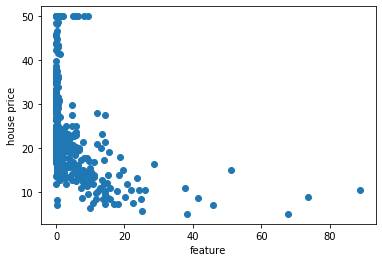

In [22]:
# explore the data set
import matplotlib.pyplot as plt

# plot function to show vectors
#plt.plot(X[:, 0])

#scatter
plt.scatter(X[:, 0], y)
plt.xlabel('feature')
plt.ylabel('house price')

### 2. OLS


In [23]:
# OLS: ordinary least squares
from sklearn.linear_model import LinearRegression as LR

slr = LR()
slr.fit(X_train, y_train) # train

#evaluate
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print('Results of the OLS:')
regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Results of the OLS:
MSE Train:  19.958
MSE Test:  27.196
R^2 Train:  0.765
R^2 Test:  0.673


### 3. Decision Trees

In [24]:
# Decision tree example
from sklearn.tree import DecisionTreeRegressor as DTR

dtr = DTR(criterion = 'mse') 
#other input parameters of decision tree regressor: 
# max_depth: max depth of the tree; deep tree results in overfitting
# min_samples_leaf: min # of samples for leaf nodes; increase this number can solve the overfitting problem

dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)
print('Results of decision tree:')

regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Results of decision tree:
MSE Train:  0.0
MSE Test:  27.564
R^2 Train:  1.0
R^2 Test:  0.669


#### Observations from the above results

In [27]:
# explore the trained decision tree
from sklearn import tree

print('depth', dtr.get_depth())
print('subregions', dtr.get_n_leaves())

t = tree.export_text(dtr)
print(t)

depth 17
subregions 332
|--- feature_5 <= 6.80
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.47
|   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  1.47
|   |   |   |--- feature_5 <= 6.53
|   |   |   |   |--- feature_12 <= 9.66
|   |   |   |   |   |--- feature_9 <= 208.00
|   |   |   |   |   |   |--- value: [36.20]
|   |   |   |   |   |--- feature_9 >  208.00
|   |   |   |   |   |   |--- feature_5 <= 6.13
|   |   |   |   |   |   |   |--- feature_2 <= 15.47
|   |   |   |   |   |   |   |   |--- feature_11 <= 384.82
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 8.61
|   |   |   |   |   |   |   |   |   |   |   |--- value: [19.40]
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  8.61
|   |   |   |   |   |   |   |   |   |   |   |--- value: [18.20]
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.07
|   |   |   |   |   |   |   |   |   |   |--- value: [20.60]
|   |   |   |   |   |   |   |   

#### Improve the decision tree model

In [45]:
dtr1 = DTR(criterion = 'mse', max_depth = 5)

In [46]:
dtr1.fit(X_train, y_train)

y_train_pred = dtr1.predict(X_train)
y_test_pred = dtr1.predict(X_test)
print('Results of decision tree:')

regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Results of decision tree:
MSE Train:  6.077
MSE Test:  24.027
R^2 Train:  0.928
R^2 Test:  0.711


In [76]:
dtr2 = DTR(criterion = 'mse', min_samples_leaf = 10, random_state=0)

dtr2.fit(X_train, y_train)

y_train_pred = dtr2.predict(X_train)
y_test_pred = dtr2.predict(X_test)
print('Results of decision tree:')

regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

Results of decision tree:
MSE Train:  11.723
MSE Test:  22.261
R^2 Train:  0.862
R^2 Test:  0.733


#### feature importance

In [79]:
## Attributes and functions of DTR class--> explainability of the model

# Feature importance is computed as the (normalized) total reduction of 
# the criterion (MSE) brought by that feature

cols = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

dtr1.feature_importances_


array([0.08426339, 0.        , 0.        , 0.        , 0.00636793,
       0.63369223, 0.00563764, 0.05406999, 0.        , 0.00337008,
       0.0257303 , 0.00563766, 0.18123079])

### 4. Random Forests

In [1]:
# Random forests
from sklearn.ensemble import RandomForestRegressor as RFR

rf = RFR(n_estimators = 20, max_features = 5, max_depth = 3, random_state)
# criterion = 'mse', max_depth = 5, min_samples_leaf = 10, random_state = 0)
# max_features： 'sqrt' means  sqrt(n_features); other options: 'log2', 'auto'

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Results of random forest:')
regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

NameError: name 'X_train' is not defined

In [127]:
# Attributes of RFR
rf_tree0 = rf.estimators_[0]
visulize_tree(rf_tree0)

print_ftr_imp(rf.feature_importances_)

('CRIM', 0.052668654641474355)
('ZN', 0.001391486480880629)
('INDUS', 0.06279535756550528)
('CHAS', 0.0)
('NOX', 0.03441191274542054)
('RM', 0.38083794995926024)
('AGE', 0.020797566420779172)
('DIS', 0.022631514330485724)
('RAD', 0.0027858535901883518)
('TAX', 0.03506567772295118)
('PTRATIO', 0.09140581074221314)
('B', 0.0014577114974916561)
('LSTAT', 0.29375050430334965)
